## Lab Part 1
## LUNAR TOPOGRAPHY, GRAVITY FIELD, AND BOUGUER ANOMALIES
April, 2020

Here, we will begin with gridded arrays of topography and gravity to examine the mass excesses found within lunar craters, which are known as mascons. 

The simple dataset is from the Clementine mission (superceded by the LOLA data for topography and the GRAIL data for gravity): http://geo.pds.nasa.gov/dataserv/gravity_models.htm

Navigate to Moon -> Clementine -> Gravity/Topo -> subdirectories for each *.dat and *.lbl file<br>
The *dat files contain 2D ascii arrays in 1 degree bins.<br>
The *lbl files describe the data and provide the units.<p>

We will use the following files:<br>
    topogrd1.dat<br>
    geoidgrd.dat<br>
    fairgrd1.dat<br>
    bouggrd.dat<br>


Shape of the topo array: (180, 360)


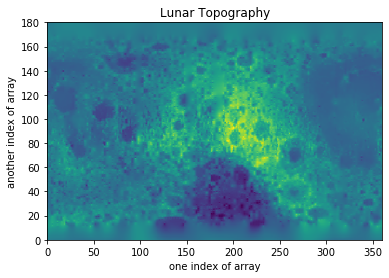

In [1]:
import matplotlib.image as mpimg 

import matplotlib.pyplot as plt 
import numpy as np
import math

# Read Images 
topo0 = np.loadtxt('topogrd1.dat') # just a simple way to read an ascii file
topo=np.reshape(topo0,(180,360)) # make the array shape work for latitude and longitude
print('Shape of the topo array:', topo.shape) # check the array shape

## Plot as an image

plt.pcolormesh(topo) # plot a 2D numpy array with the default color scheme
plt.xlabel('one index of array')
plt.ylabel('another index of array')
plt.title('Lunar Topography')
plt.show()


# Figure out whether or not the orientation of the 2D array is OK

<img src="MoonTopoLOLA.png"><p>
<img src="lunarImpactBasins.png">

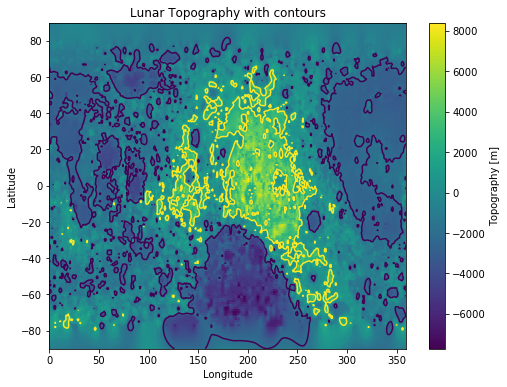

In [2]:
## Add X, Y variables, countours and labels

lat= np.linspace(-90,90,180)
lon= np.linspace(0,360,360)

fig=plt.figure(figsize=[8,6])
ax=fig.add_subplot(111)
pc=ax.pcolormesh(lon,lat,topo) # X, Y, Z variables now
cbar=fig.colorbar(pc)
cbar.set_label('Topography [m]')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Lunar Topography with contours')
ax.contour(lon,lat,topo,[-2000,0,2000]) # create contours at -2000.0m, 0m, 2000.0m


# Make a few line plots at constant latitude

1) Find the middle of the South Pole Aiken (approx)<br>
2) Find a latitude that cuts through the Serenitatis and Crisium basins<br>
3) Find Orientale basin, one of the youngest on the Moon<p>

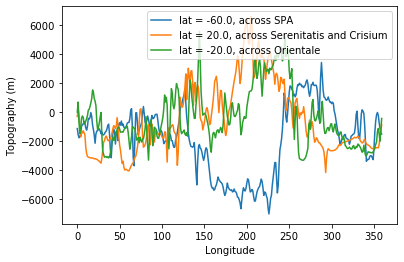

In [3]:
# Plot a couple of profiles (colatitude, longitude) to check that you understand the axes on the 2D
# array and the units in the file
# replace 1,2,3 with better latitude indices
fig, ax = plt.subplots()
ax.plot(topo[30,:], label = 'lat = -60.0, across SPA') # across South Pole Aitken -- the big basin on the far side of the Moon
ax.plot(topo[110,:], label = 'lat = 20.0, across Serenitatis and Crisium') # across Serenitatis and Crisum
ax.plot(topo[70,:], label = 'lat = -20.0, across Orientale') # across Orientale
ax.set_xlabel('Longitude')
ax.set_ylabel('Topography (m)')
ax.legend()
fig.show()

* In the blue line, the profile of SPA could be seen in the middle
* In the orange line, the profile of Serenitatis and Crisum could be seen on the left
* In the green line, the profile of Orientale is at around lon 260.

## Load and plot the GEOID data and the Free Air Anomaly data
Make line plots across the same latitudes to confirm that you undertand the units (which are in the *lbl files).


Shape of the topo array: (180, 360)


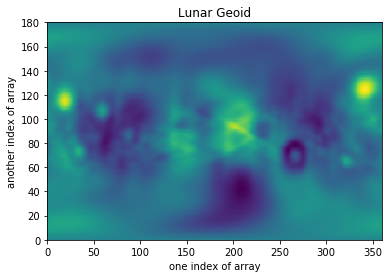

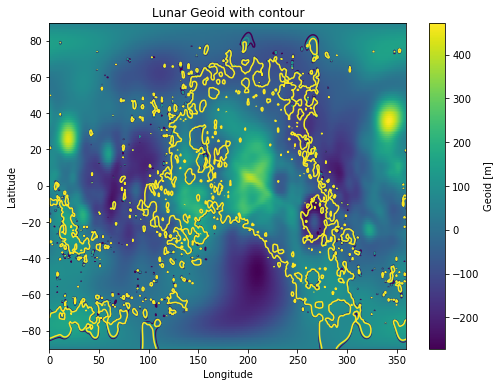

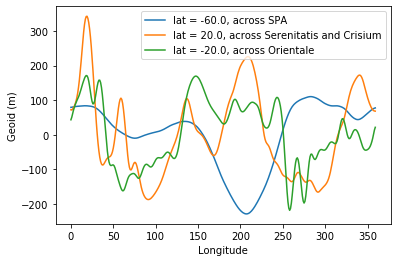

In [4]:
# Read in the Geoid data and make map and line plots
# Read Images 
geoid0 = np.loadtxt('geoidgrd.dat') # just a simple way to read an ascii file
geoid = np.reshape(geoid0,(180,360)) # make the array shape work for latitude and longitude
print('Shape of the topo array:', geoid.shape) # check the array shape

## Plot as an image
fig, ax = plt.subplots()
ax.pcolormesh(geoid) # plot a 2D numpy array with the default color scheme
ax.set_xlabel('one index of array')
ax.set_ylabel('another index of array')
ax.set_title('Lunar Geoid')
fig.show()

fig=plt.figure(figsize=[8,6])
ax=fig.add_subplot(111)
pc=ax.pcolormesh(lon,lat,geoid) # X, Y, Z variables now
cbar=fig.colorbar(pc)
cbar.set_label('Geoid [m]')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Lunar Geoid with contour')
ax.contour(lon,lat,topo,[-100,0,100])  # create contours at -100.0, 0.0, 100.0 mgal

# Plot a couple of profiles (colatitude, longitude) to check that you understand the axes on the 2D
# array and the units in the file
# replace 1,2,3 with better latitude indices
fig, ax = plt.subplots()
ax.plot(geoid[30,:], label = 'lat = -60.0, across SPA') # across South Pole Aitken -- the big basin on the far side of the Moon
ax.plot(geoid[110,:], label = 'lat = 20.0, across Serenitatis and Crisium') # across Serenitatis and Crisum
ax.plot(geoid[70,:], label = 'lat = -20.0, across Orientale') # across Orientale
ax.set_xlabel('Longitude')
ax.set_ylabel('Geoid (m)')
ax.legend()


Shape of the topo array: (180, 360)


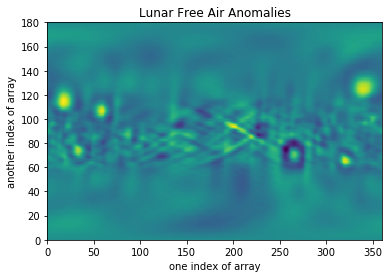

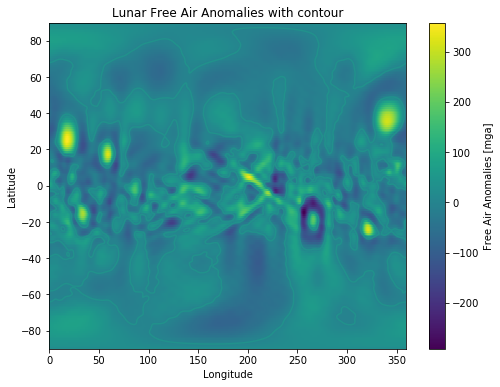

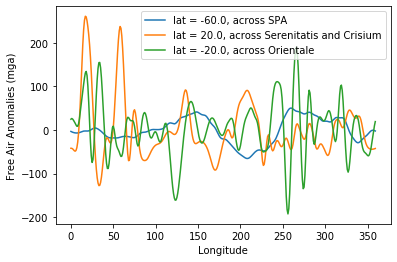

In [5]:
# Read in the Free air anomaly data and make map and line plots
# Read Images 
mga = 1e-5  # convert mga to m/s^2
free_air0 = np.loadtxt('fairgrd1.dat') * mga # just a simple way to read an ascii file, convert to m*s^-2
free_air = np.reshape(free_air0,(180,360)) # make the array shape work for latitude and longitude
print('Shape of the topo array:', free_air.shape) # check the array shape

## Plot as an image

plt.pcolormesh(free_air) # plot a 2D numpy array with the default color scheme
plt.xlabel('one index of array')
plt.ylabel('another index of array')
plt.title('Lunar Free Air Anomalies')
plt.show()

fig=plt.figure(figsize=[8,6])
ax=fig.add_subplot(111)
pc=ax.pcolormesh(lon,lat,free_air/mga) # X, Y, Z variables now
cbar=fig.colorbar(pc)
cbar.set_label('Free Air Anomalies [mga]')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Lunar Free Air Anomalies with contour')
ax.contour(lon,lat,free_air,[-100,0,100])
plt.show()

# Plot a couple of profiles (colatitude, longitude) to check that you understand the axes on the 2D
# array and the units in the file
# replace 1,2,3 with better latitude indices
fig, ax = plt.subplots()
ax.plot(free_air[30,:]/mga, label = 'lat = -60.0, across SPA') # across South Pole Aitken -- the big basin on the far side of the Moona
ax.plot(free_air[110,:]/mga, label = 'lat = 20.0, across Serenitatis and Crisium') # across Serenitatis and Crisum
ax.plot(free_air[70,:]/mga, label = 'lat = -20.0, across Orientale') # across Orientale
ax.set_xlabel('Longitude')
ax.set_ylabel('Free Air Anomalies (mga)')
ax.legend()
fig.show()

## Calculate the Bouger anomaly 

Define the Bouger anomaly as:

$\Delta g_B = \Delta g_{fa} - 2 \pi G \rho h$

First, convert the free air anomaly into mks units (m/s$^2$).<br>
Here, use the topography data for h and assume that the crustal density is about 2800 kg/m$^3$.<br>
G=6.67408e-11 m$^3$ kg$^{-1}$ s$^{-2}$.

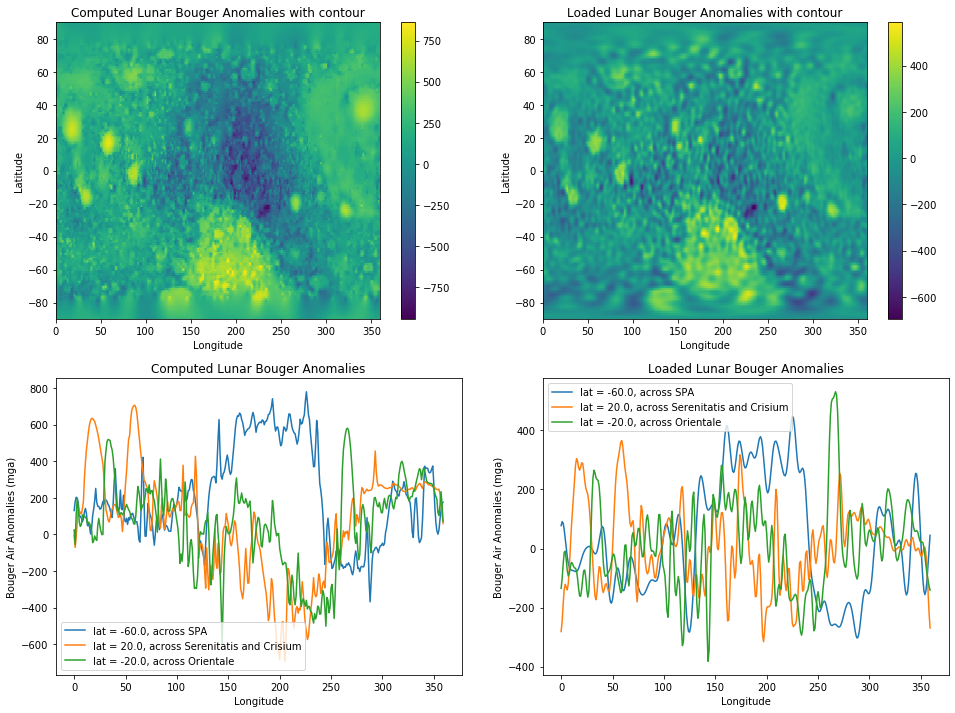

In [6]:
## calculate the Bouger anomaly with constant density crust assumption.
G = 6.67408e-11  # m^3 * kg^-1 * s^-2
rho = 2800.0  # kg/m^3
bouger_anomaly_computed = free_air - 2 * np.pi * G * rho * topo
fig, axs = plt.subplots(2, 2, figsize=[16,12])  # plot Bouger anomaly
pc_computed = axs[0,0].pcolormesh(lon,lat,bouger_anomaly_computed/mga) # plot as mga
fig.colorbar(pc_computed, ax=axs[0, 0])
cbar.set_label('Bouger Anomalies [mga]')
axs[0,0].set_xlabel('Longitude')
axs[0,0].set_ylabel('Latitude')
axs[0,0].set_title('Computed Lunar Bouger Anomalies with contour')

## Load a Bouger anomaly to compare

bouger_anomaly_loaded = np.loadtxt('bouggrd.dat') * mga  # convert to m/s^2
bouger_anomaly_loaded = np.reshape(bouger_anomaly_loaded, (180, 360))
pc_loaded = axs[0, 1].pcolormesh(lon,lat,bouger_anomaly_loaded/mga) # plot as mga
fig.colorbar(pc_loaded, ax=axs[0, 1])
cbar.set_label('Bouger Anomalies [mga]')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')
axs[0, 1].set_title('Loaded Lunar Bouger Anomalies with contour')

# Plot a couple of profiles to show Buoger anomaly acrosee major basins
axs[1, 0].plot(bouger_anomaly_computed[30,:]/mga, label = 'lat = -60.0, across SPA') # across South Pole Aitken -- the big basin on the far side of the Moona
axs[1, 0].plot(bouger_anomaly_computed[110,:]/mga, label = 'lat = 20.0, across Serenitatis and Crisium') # across Serenitatis and Crisum
axs[1, 0].plot(bouger_anomaly_computed[70,:]/mga, label = 'lat = -20.0, across Orientale') # across Orientale
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Bouger Air Anomalies (mga)')
axs[1, 0].set_title('Computed Lunar Bouger Anomalies')
axs[1, 0].legend()

# Plot a couple of profiles to show Buoger anomaly acrosee major basins for loaded results
axs[1, 1].plot(bouger_anomaly_loaded[30,:]/mga, label = 'lat = -60.0, across SPA') # across South Pole Aitken -- the big basin on the far side of the Moona
axs[1, 1].plot(bouger_anomaly_loaded[110,:]/mga, label = 'lat = 20.0, across Serenitatis and Crisium') # across Serenitatis and Crisum
axs[1, 1].plot(bouger_anomaly_loaded[70,:]/mga, label = 'lat = -20.0, across Orientale') # across Orientale
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Bouger Air Anomalies (mga)')
axs[1, 1].set_title('Loaded Lunar Bouger Anomalies')
axs[1, 1].legend()
fig.show()

## My calculations

You should get plots that look something like this:<p>
<img src="Bouger-simple-map.png" width=700>

<img src="Bouger-simple-lines.png" width=700>

## ESTIMATED MASCONS

Now, assume that the Bouger anomaly is entirely due to flood basalts within the craters.

Fit the peak value of the Bouger anomaly over Serenitatis and Crisium assuming that you add a mass of thickness h and density 3200 kg/m3. 

How thick does the mare need to be to explain the peak of the Bouger anomaly? (estimate to ~1 km)


In [7]:
# Calculate the gravity anomaly from an infinite sheet of thickness h and density 3200 kg/m3
# watch your units
# what thickness can explain the observed peak?

rho_basalt = 3200.0
km = 1000.0
bouger_peak_serenitatis = np.max(bouger_anomaly_computed[110, 0:50])
bouger_peak_crisium = np.max(bouger_anomaly_computed[110, 50:100])
thickness_serenitatis = bouger_peak_serenitatis / (2 * np.pi * G * (rho_basalt - rho))
thickness_crisium = bouger_peak_crisium / (2 * np.pi * G * (rho_basalt - rho))
print('The mare need to be %.0f km to explain the serenitatis peak' % (thickness_serenitatis/km))
print('The mare need to be %.0f km to explain the crisium peak' % (thickness_crisium/km))

The mare need to be 38 km to explain the serenitatis peak
The mare need to be 42 km to explain the crisium peak


## ACTUAL MASCONS

The actual mascons should be thinner than our calculations.

From Williams & Zuber, Lunar & Planetary Science Conference, 1996.
They measured lava flooding depths by comparing the depth of partially-flooded craters to the depth of craters of the same size that had not been flooded.

<img src="Basins.png"><p>
    
If the actual mascons are thinner than needed to explain the observed gravity anomaly, what does that mean about the structure beneath impact basins? (has to do with tomorrow's lecture)

END OF PART1

I think this means that the lunar crust is thinned beneath impact basins, and that should account for most of there bouger anomaly. Thus the crust need to thined at least 10 - 20km using the data from the loaded bouger anomaly map